<a href="https://colab.research.google.com/github/EllenSakkla/Python/blob/main/Copy_of_11_Page_Views_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discovery project - page views

### Adapted from freeCodeCamp [project](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/page-view-time-series-visualizer)

For this project you will visualise data that has values recorded against time.  You will use Pandas and Matplotlib to visualise the dataset which contains the number of page views each day on the freeCodeCamp.org forum between 2016-05-09 and 2019-12-03. You will create a line chart, a bar chart, and some box plots to create visualisations that will help you understand the patterns in visits to the forum and identify growth over various time ranges (yearly, monthly, etc).


The dataset can be read from here: "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv"

Visualise and analyse the data in the following ways:



In [131]:
import pandas as pd
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv"
df = pd.read_csv(url)

display(df.head())
display(df.info())
#if left as df.head() and df.info() on 2 seperate lines, it will only show the df.info(), so better have it as display(df.head()) etc.

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


None

### 1.  a line plot, similar to this 
---
![example](https://drive.google.com/uc?id=1Cic5SybYEc86rqbwTCZzyEf4rzQNWJLP) (taken from the freeCodeCamp site) and with similar labelling.

To prepare the data for the line plot you might do the following:  

*  convert the `date` column to **datetime** type 
*  create 3 new columns for `year`, `month` and `day` (use `dt.year, dt.strftime to get the month name, dt.day`)
*  set the index to the **date** column.
*  clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.


In [132]:
from datetime import datetime, timezone
df['date'] = pd.to_datetime(df.date)
#df.dtypes

df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['month_name'] = df['date'].dt.strftime('%B')
#adding a separate column for month in string form i.e. May etc cause it'll be needed further down for the bar pivot into ex2.
df['day'] = df.date.dt.day
df

,date,value,year,month,month_name,day
0,2016-05-09,1201,2016,5,May,9
1,2016-05-10,2329,2016,5,May,10
2,2016-05-11,1716,2016,5,May,11
3,2016-05-12,10539,2016,5,May,12
4,2016-05-13,6933,2016,5,May,13
...,...,...,...,...,...,...
1299,2019-11-29,171584,2019,11,November,29
1300,2019-11-30,141161,2019,11,November,30
1301,2019-12-01,142918,2019,12,December,1
1302,2019-12-02,220144,2019,12,December,2


In [133]:
df = df.set_index('date')
#df.set_index('date', inplace=True)

upper = df['value'].quantile(0.975)
lower = df['value'].quantile(0.025)

# in_range = upper - lower
# print(in_range)
# upper_limit = (upper + 1.5 * in_range) 
# lower_limit = (lower - 1.5 * in_range) 
# print(upper_limit, lower_limit)
#N/A here because this targets the inside range in btwn top 2.5% and bottom 2.5%#

df_filtered = df[(df['value']<=upper) & (df['value']>=lower)]
#df_filtered = df_filtered[(df_filtered['value']>=lower)]
display(df_filtered)


,value,year,month,month_name,day
date,,,,,
2016-05-19,19736,2016,5,May,19
2016-05-26,18060,2016,5,May,26
2016-05-27,19997,2016,5,May,27
2016-05-28,19044,2016,5,May,28
2016-05-29,20325,2016,5,May,29
...,...,...,...,...,...
2019-11-24,138875,2019,11,November,24
2019-11-29,171584,2019,11,November,29
2019-11-30,141161,2019,11,November,30


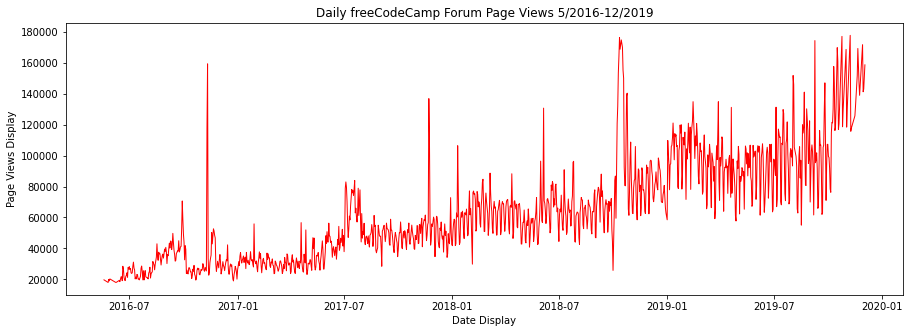

In [134]:
fig, ax = plt.subplots(figsize = (15,5))
#ax.plot(df.index, df['date'], color= 'red', linewidth=1) 
#N/A
ax.plot(df_filtered.index, df_filtered['value'], color= 'red', linewidth=1)
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date Display')
ax.set_ylabel('Page Views Display')
plt.show()

###2. a bar chart similar to this 
---

![example](https://drive.google.com/uc?id=15-tIwheaCIcUsx6jfg5DBAWFVGE4bHzK) (taken from the freeCodeCamp site) and with similar labelling.  It should show average daily page views for each month grouped by year. 

To prepare the data for the bar chart you should create a pivot table and can use pivot_table_name.plot(kind='bar')


month             1              2   ...             11             12
year                                 ...                              
2016             NaN            NaN  ...   40448.633333   27832.419355
2017    32785.161290   31113.071429  ...   57701.566667   48420.580645
2018    58580.096774   65679.000000  ...   78688.333333   80047.483871
2019   102056.516129  105968.357143  ...  143166.428571  150733.500000

[4 rows x 12 columns]


<Figure size 3600x1440 with 0 Axes>

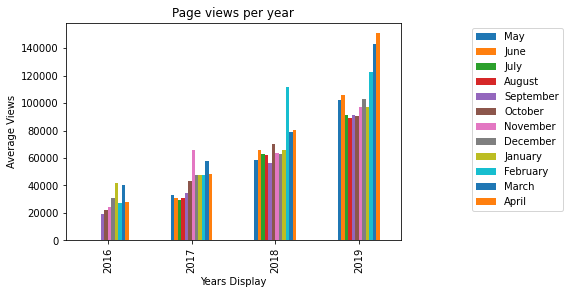

In [136]:
# df_pivot = pd.pivot_table(df, 
#       values = 'column1 name',
#       index = 'column2 name', 
#       columns = 'column3 name',
#       aggfunc = np.mean
#       )

table = pd.pivot_table(df_filtered, values = "value", index = "year", columns = "month", aggfunc = np.mean)
print(table)

plt.figure(figsize= (20, 15))
#columns = month
labels=df_filtered['month_name'].unique()
table.plot(kind='bar', xlabel = 'Years Display', ylabel = 'Average Views', title = 'Page views per year').legend(labels, bbox_to_anchor=(1.5, 1))

#Seaborn alternative could have worked better here

###3.  a set of box plots similar to this
---
 ![example](https://drive.google.com/uc?id=1kqhGKnA0Ybtyw2cew67u3_ogMS9Fb1hM)

These box plots should show how the values are distributed within a given year or month and how it compares over time. 


###4.  predict the number of page views in the year 2020 based on the data up to 2019
---

*  perform a linear regression and create a line of best fit 
*  predict the page views in the year 2020, 2025 and 2030 if identified trends persist. 


# Reflect

What caused the biggest problems?
How did you solve these problems?